In [15]:
import tensorflow as tf
print ("TensorFlow version: " + tf.__version__)

TensorFlow version: 1.11.0


In [16]:
import keras
print ("Keras version: " + keras.__version__)

Keras version: 2.2.3


In [17]:
#import models & layers from keras
from keras.callbacks import TensorBoard
from keras import models
from keras import layers

In [18]:
import numpy as np
print (np.__version__)

1.14.3


In [19]:
from sklearn.metrics import roc_auc_score
from keras.callbacks import Callback
class roc_callback(Callback):
    def __init__(self,training_data,validation_data):
        self.x = training_data[0]
        self.y = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]


    def on_train_begin(self, logs={}):
        return

    def on_train_end(self, logs={}):
        return

    def on_epoch_begin(self, epoch, logs={}):
        return

    def on_epoch_end(self, epoch, logs={}):
        y_pred = self.model.predict(self.x)
        roc = roc_auc_score(self.y, y_pred)
        y_pred_val = self.model.predict(self.x_val)
        roc_val = roc_auc_score(self.y_val, y_pred_val)
        print('\rroc-auc: %s - roc-auc_val: %s' % (str(round(roc,4)),str(round(roc_val,4))),end=100*' '+'\n')
        return

    def on_batch_begin(self, batch, logs={}):
        return

    def on_batch_end(self, batch, logs={}):
        return
    

In [20]:
#import libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
test_attr=[]

In [21]:
#Load the data from local file into a dataframe
import pandas as pd

df = pd.read_csv('../CSV/sliding_windows_13_5.csv')

In [22]:
df.shape

(149471, 53)

In [23]:
df_1=df[df['1.13'] == 1]

In [24]:
df_1.shape

(73708, 53)

In [25]:
df_0=df[df['1.13'] == 0]

In [26]:
df_0.shape

(75763, 53)

In [27]:
#df_0=df_0[:68342]

In [28]:
#df_1.shape

In [29]:
#df_0.shape

In [30]:
#df=pd.concat([df_1,df_0])

In [31]:
#df.shape

In [32]:
df

0  0.1  0.2  1  0.3  0.4  0.5  1.1  0.6  1.2  ...   0.32  0.33  1.11  \
0       1    0    0  0    0    0    0    1    0    0  ...      0     1     0   
1       1    0    0  0    0    0    0    1    0    0  ...      0     0     0   
2       1    0    0  0    1    0    0    0    1    0  ...      0     0     0   
3       0    0    1  0    0    0    1    0    1    0  ...      1     0     0   
4       1    0    0  0    0    0    0    1    0    0  ...      0     1     0   
5       0    0    1  0    0    0    1    0    0    1  ...      1     1     0   
6       0    0    1  0    0    0    1    0    0    0  ...      1     0     0   
7       0    0    1  0    0    0    0    1    1    0  ...      0     0     0   
8       1    0    0  0    0    0    0    1    0    1  ...      1     0     0   
9       0    1    0  0    0    0    0    1    0    1  ...      0     1     0   
10      1    0    0  0    0    0    0    1    0    1  ...      1     0     1   
11      0    0    0  1    0    1    0    0    0    0  ...      0     1     0   
12      0    1    0  0    1    0    0    0    0    0  ...      0     0     0   
13      0    1    0  0    0    0    0    1    0    0  ...      0     0     0   
14      0    1    0  0    0    0    0    1    0    0  ...      0     1     0   
15      0    1    0  0    0    1    0    0    0    1  ...      0     0     0   
16      0    0    1  0    1    0    0    0    0    1  ...      0     0     0   
17      0    0    1  0    0    1    0    0    0    1  ...      0     0     0   
18      0    1    0  0    0    1    0    0    0    1  ...      0     0     0   
19      0    0    1  0    1    0    0    0    0    0  ...      0     0     1   
20      0    0    1  0    0    0    1    0    1    0  ...      0     1     0   
21      0    0    1  0    1    0    0    0    0    1  ...      0     0     0   
22      0    0    1  0    0    0    0    1    0    0  ...      0     1     0   
23      0    0    1  0    0    1    0    0    0    1  ...      1     0     0   
24      0    1    0  0    0    0    0    1    0    1  ...      0     1     0   
25      0    1    0  0    1    0    0    0    1    0  ...      0     0     0   
26      0    0    0  1    0    0    0    1    0    0  ...      1     0     0   
27      1    0    0  0    0    0    0    1    0    0  ...      0     0     0   
28      1    0    0  0    0    0    0    1    0    0  ...      1     0     0   
29      0    1    0  0    0    0    1    0    0    0  ...      0     0     0   
...    ..  ...  ... ..  ...  ...  ...  ...  ...  ...  ...    ...   ...   ...   
149441  0    0    0  1    0    0    1    0    1    0  ...      0     1     0   
149442  0    0    0  1    0    0    1    0    0    1  ...      0     1     0   
149443  1    0    0  0    1    0    0    0    0    0  ...      0     0     1   
149444  0    0    1  0    1    0    0    0    0    0  ...      0     0     0   
149445  0    0    1  0    1    0    0    0    0    0  ...      0     1     0   
149446  0    1    0  0    1    0    0    0    0    0  ...      1     0     0   
149447  0    1    0  0    0    0    1    0    0    1  ...      0     1     0   
149448  1    0    0  0    0    0    0    1    0    0  ...      1     1     0   
149449  0    1    0  0    0    0    1    0    0    0  ...      0     0     1   
149450  1    0    0  0    0    0    0    1    0    0  ...      0     0     1   
149451  0    0    0  1    0    0    1    0    0    1  ...      1     0     1   
149452  0    0    0  1    0    0    0    1    0    0  ...      1     0     0   
149453  0    0    1  0    0    0    0    1    0    0  ...      0     0     1   
149454  0    0    1  0    0    1    0    0    1    0  ...      0     0     0   
149455  0    0    1  0    0    0    0    1    0    0  ...      1     1     0   
149456  0    0    0  1    0    0    1    0    0    0  ...      0     0     0   
149457  0    0    1  0    0    1    0    0    0    1  ...      0     0     1   
149458  0    1    0  0    0    1    0    0    0    1  ...      0     0     0   
149459  

In [33]:
#yeast_df=pd.read_csv('drive/My Drive/keras/yeast_sliding_windows.csv')

In [34]:
#df1=df_s[:15000]

#df2=df_s[-15000:]

In [35]:
#df = pd.concat([df1, df2])

In [36]:
#df[52]

In [37]:
#select input and output
test_Y = df['1.13'].values.reshape(df.shape[0],1) #select the label (correct output)
df = df.drop('1.13', 1) #remove the label from input
dataset = df.values
X = dataset[:,:dataset.shape[1]] #select features (input data)
 
#splitting the data into training and testing
#from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, test_Y, test_size=0.2, random_state=1 ) # training to testing ratio is 0.8:0.2

In [39]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1)

In [40]:
from keras.models import Sequential

model = Sequential()

In [52]:
neurons_1=16
neurons_2=32
neurons_3=16
neurons_4=8
epoche=50
rate=0.001

In [53]:
from keras.callbacks import TensorBoard
from keras import models
from keras import layers
from keras.optimizers import SGD, RMSprop, Adam, Adadelta
from keras import optimizers
from keras import losses
from keras import metrics
from keras.layers import Dense, Activation
model = models.Sequential()

model.add(Dense(neurons_1, input_shape=(52,), activation='relu'))
#model.add(Dense(units=neurons_2, activation='relu'))
#model.add(Dense(units=neurons_3, activation='relu'))
#model.add(Dense(units=neurons_4, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [54]:
model.compile(optimizer=keras.optimizers.RMSprop(lr=rate), loss=keras.losses.binary_crossentropy, metrics=['acc'])

In [55]:
h = model.fit(X_train, Y_train, epochs=epoche,validation_data=(X_val, Y_val),callbacks=[roc_callback(training_data=(X_train, Y_train),validation_data=(X_val, Y_val))], batch_size=100, verbose=1)

Train on 95660 samples, validate on 23916 samples
Epoch 1/50
95660/95660 [==============================] - 1s 14us/step - loss: 0.4334 - acc: 0.8037 - val_loss: 0.4028 - val_acc: 0.8215
roc-auc: 0.901 - roc-auc_val: 0.8994                                                                                                    
Epoch 2/50
95660/95660 [==============================] - 1s 12us/step - loss: 0.3977 - acc: 0.8237 - val_loss: 0.3990 - val_acc: 0.8237
roc-auc: 0.9027 - roc-auc_val: 0.9012                                                                                                    
Epoch 3/50
95660/95660 [==============================] - 1s 12us/step - loss: 0.3945 - acc: 0.8249 - val_loss: 0.3957 - val_acc: 0.8253
roc-auc: 0.9044 - roc-auc_val: 0.9024                                                                                                    
Epoch 4/50
95660/95660 [==============================] - 1s 13us/step - loss: 0.3910 - acc: 0.8266 - val_loss: 0.3932 - val_a

95660/95660 [==============================] - 1s 14us/step - loss: 0.3757 - acc: 0.8353 - val_loss: 0.3845 - val_acc: 0.8345
roc-auc: 0.9132 - roc-auc_val: 0.9087                                                                                                    
Epoch 32/50
95660/95660 [==============================] - 1s 13us/step - loss: 0.3756 - acc: 0.8352 - val_loss: 0.3832 - val_acc: 0.8345
roc-auc: 0.9133 - roc-auc_val: 0.9091                                                                                                    
Epoch 33/50
95660/95660 [==============================] - 1s 14us/step - loss: 0.3755 - acc: 0.8357 - val_loss: 0.3837 - val_acc: 0.8338
roc-auc: 0.9132 - roc-auc_val: 0.9088                                                                                                    
Epoch 34/50
95660/95660 [==============================] - 2s 16us/step - loss: 0.3754 - acc: 0.8360 - val_loss: 0.3844 - val_acc: 0.8329
roc-auc: 0.9134 - roc-auc_val: 0.9087         

In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                848       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 17        
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________


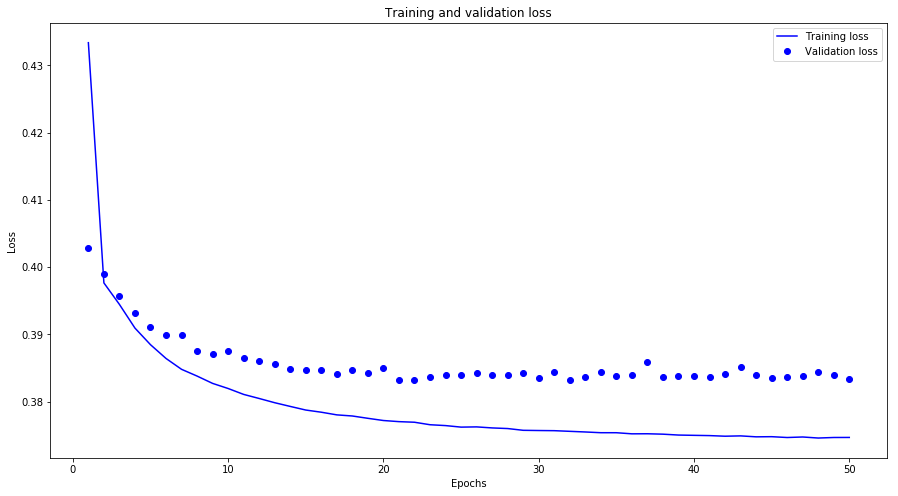

In [70]:
import matplotlib.pyplot as plt
# plot traing and validation loss

#retrieve the History object produced by the fit: a dictionary containing data about 
# everything that happened during training
history_dict = h.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

#'bo' = blue dot
#'b' = solid blue line
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'bo', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

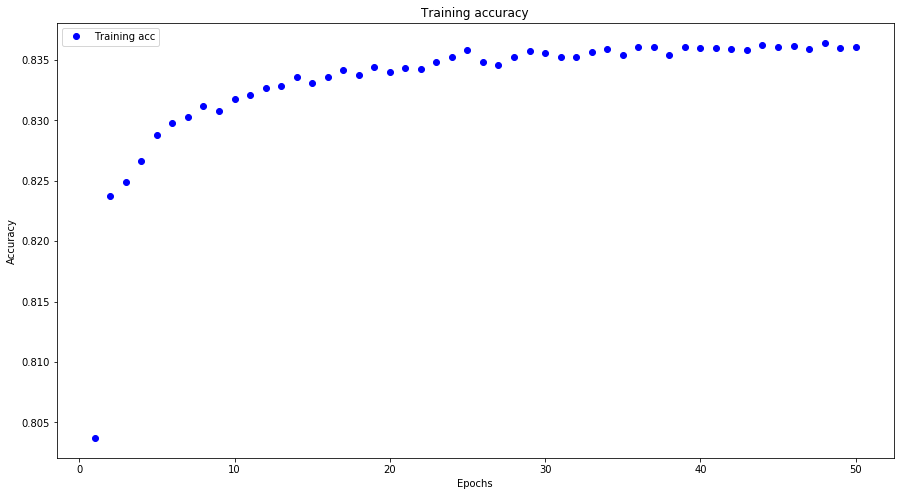

In [71]:
import matplotlib.pyplot as plt
history_dict = h.history
acc_values = history_dict['acc'] 
loss_values = history_dict['loss']
epochs = range(1, len(loss_values) + 1)


plt.clf()
plt.plot(epochs, acc_values, 'bo', label='Training acc')

plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.rcParams['figure.figsize'] = 15, 8

plt.show()

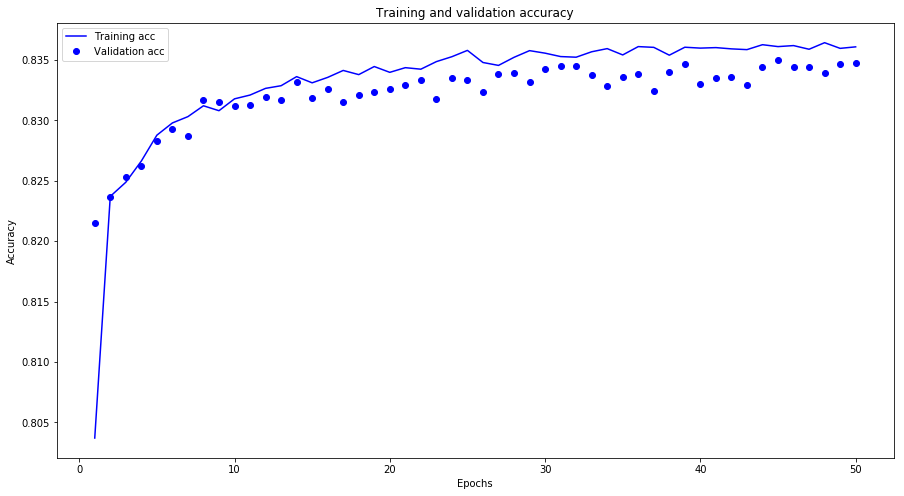

In [72]:
#plotting trainig and validation accuracy

acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']

plt.clf()
plt.plot(epochs, acc_values, 'b', label='Training acc')
plt.plot(epochs, val_acc_values, 'bo', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [73]:
#checks on test sample
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=1)
print('test_acc:', test_acc)

29895/29895 [==============================] - 1s 33us/step
test_acc: 0.8297708646950863


In [74]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test, y_pred_keras)

In [62]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

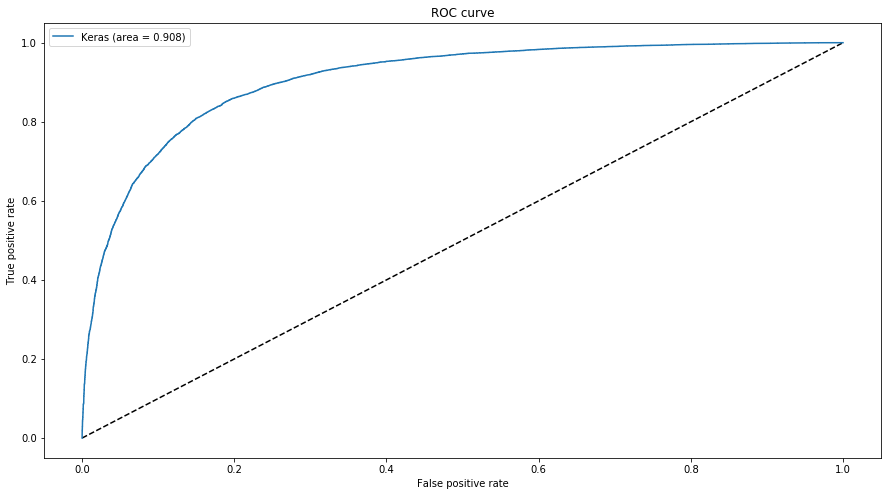

In [63]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.rcParams['figure.figsize'] = 4, 5
plt.show()
